<a href="https://colab.research.google.com/github/sophie210286/DSCI-4850-Final-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project

#### **Link to Download Dataset**

https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

#### **Packages Required**

In [73]:
# Importing Packages for entire project

# General Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,learning_curve,KFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report


# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#### **Data Collection and Problem Statement**

##### Uploading Dataset

In [2]:
from google.colab import files

uploaded = files.upload()


Saving framingham.csv to framingham.csv


In [3]:
path = "/content/framingham.csv"
df = pd.read_csv(path)
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

#####***Problem Statement***



The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. 


> The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease.

#### **Data Exploration**

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

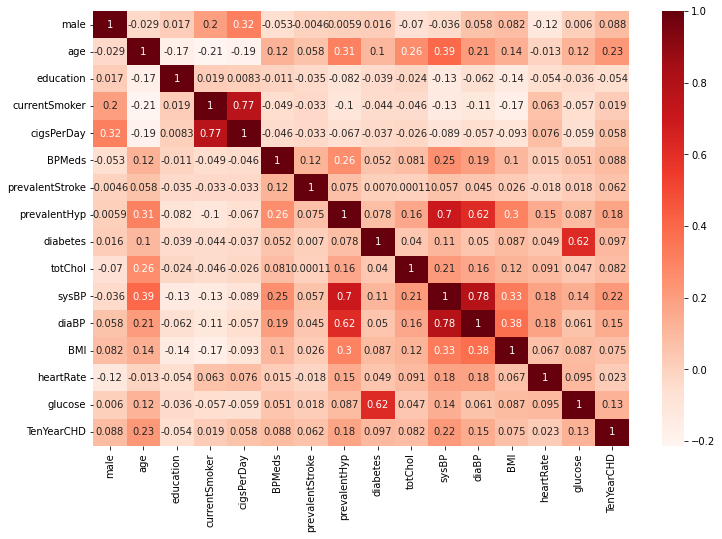

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Reds")

In [ ]:
# see how many missing values there are
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

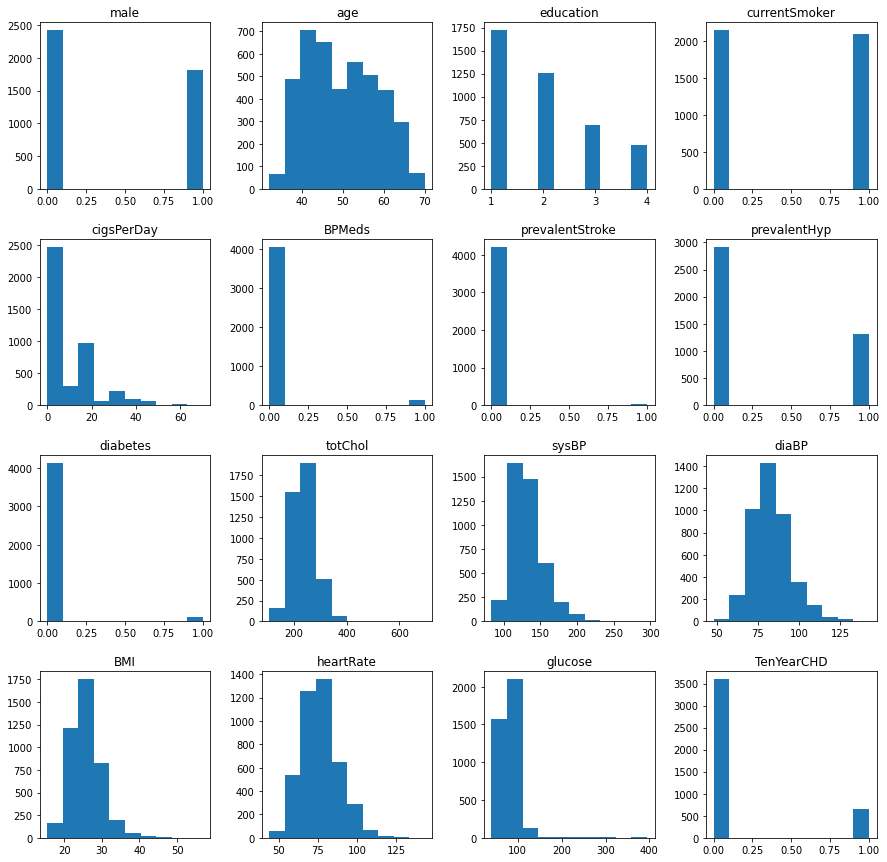

In [ ]:
# visuaize the data
df.hist(figsize = (15,15), grid = False);

In [ ]:
# some features are binary 
binary_features = [col for col in df if df[col].dropna().value_counts().index.isin([0,1]).all()]
print('The binary features are:', binary_features)

# others are continuous
continuous_features = [col for col in df.drop(binary_features, axis=1)]
print('The continuous features are:',continuous_features)

The binary features are: ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
The continuous features are: ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


#### **Training Models**
Used the same random seed for each model for repeatability. Why? This way when I change my model by either changing hyperparameters or ML algorithms and retrain it, you can be assured that any differences happen due to the changes to the model, and not due to having a different random validation set. (Ie. reproducibility)

> For each evaluation and model use 10 fold cross validation and show:
All learning curves (one plot per model, per sampling)
In tables, all fold results for all normal metrics: precision, recall, F1 score, accuracy.



##### Random Forest

Best hyperparameters: {'imputer__n_neighbors': 6, 'clf__n_estimators': 500, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_depth': 9, 'clf__class_weight': 'balanced'}

Sampling Ratio: 50%
Precision: 0.358 (+/- 0.065)
Recall: 0.380 (+/- 0.093)
F1: 0.366 (+/- 0.073)
Accuracy: 0.805 (+/- 0.022)


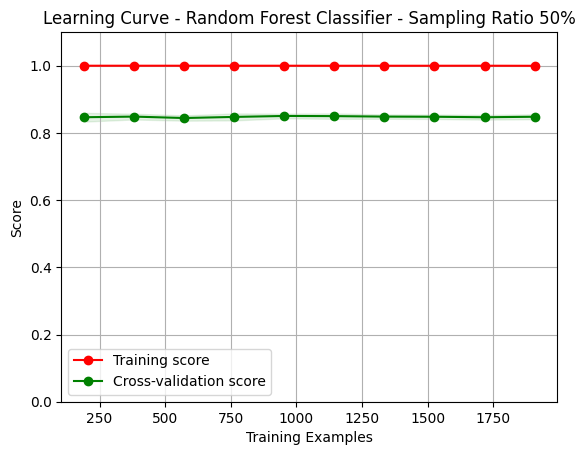

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.315 (+/- 0.056)
Recall: 0.375 (+/- 0.090)
F1: 0.341 (+/- 0.067)
Accuracy: 0.783 (+/- 0.019)


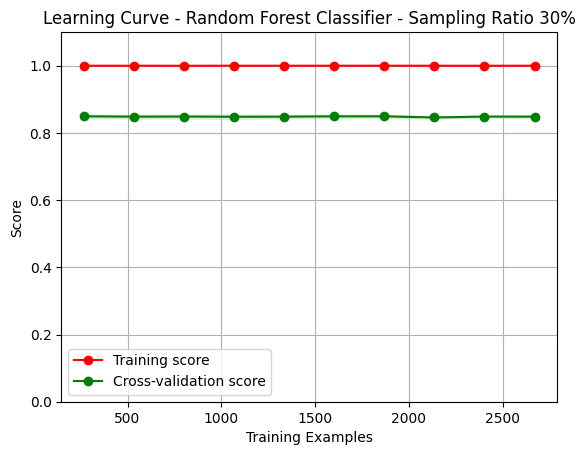

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.324 (+/- 0.049)
Recall: 0.372 (+/- 0.066)
F1: 0.346 (+/- 0.054)
Accuracy: 0.784 (+/- 0.018)


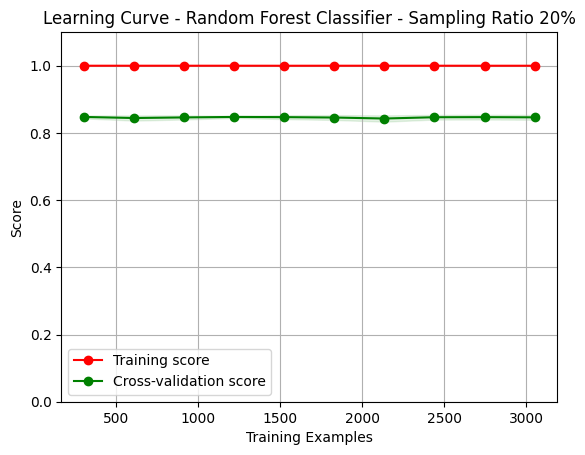

----------------------------------------------------------------------------------------------------


In [4]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# define the hyperparameters to tune
hyperparameters = {
    'imputer__n_neighbors': np.arange(1, 21),
    'clf__n_estimators': [10, 50, 100, 300, 500],
    'clf__max_depth': [3, 5, 7, 9, 13],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__class_weight': ['balanced', 'balanced_subsample', None]
}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=1234)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - Random Forest Classifier - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)

##### Perceptron

Best hyperparameters: {'imputer__n_neighbors': 2, 'clf__max_iter': 1000, 'clf__alpha': 0.7054802310718645}

Sampling Ratio: 50%
Precision: 0.244 (+/- 0.070)
Recall: 0.198 (+/- 0.108)
F1: 0.202 (+/- 0.098)
Accuracy: 0.783 (+/- 0.042)


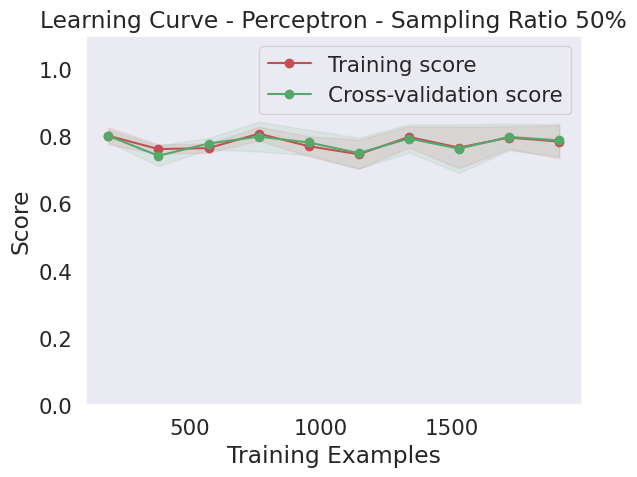

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.234 (+/- 0.136)
Recall: 0.222 (+/- 0.087)
F1: 0.206 (+/- 0.065)
Accuracy: 0.735 (+/- 0.061)


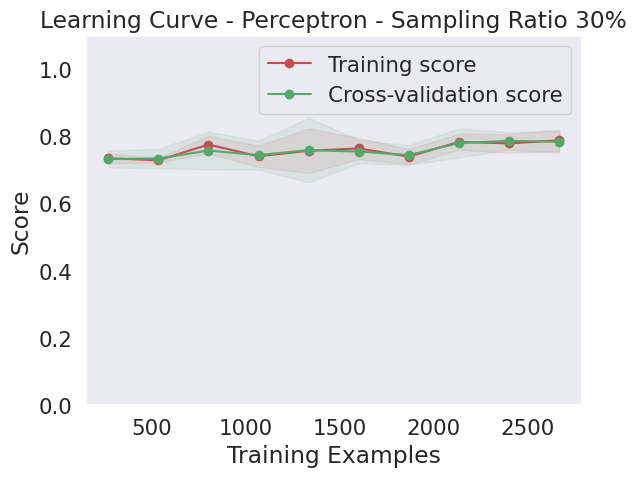

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.227 (+/- 0.133)
Recall: 0.166 (+/- 0.144)
F1: 0.164 (+/- 0.114)
Accuracy: 0.791 (+/- 0.059)


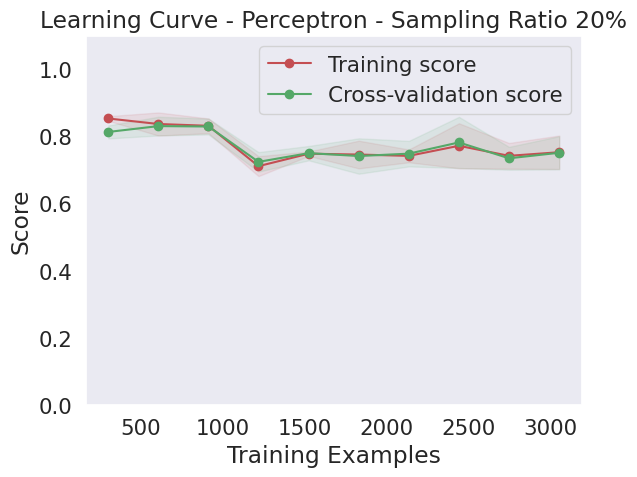

----------------------------------------------------------------------------------------------------


In [8]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('clf', Perceptron())
])

# define the hyperparameters to tune
hyperparameters = {  
    'imputer__n_neighbors': np.arange(1, 21),  
    'clf__alpha': np.logspace(-5, 1, 100),
    'clf__max_iter': [100, 500, 1000]
}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=1234)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=1234)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - Perceptron - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)
    

##### Naive Bayes (Complement)


Sampling Ratio: 50%
Precision: 0.258 (+/- 0.041)
Recall: 0.531 (+/- 0.119)
F1: 0.346 (+/- 0.059)
Accuracy: 0.701 (+/- 0.031)


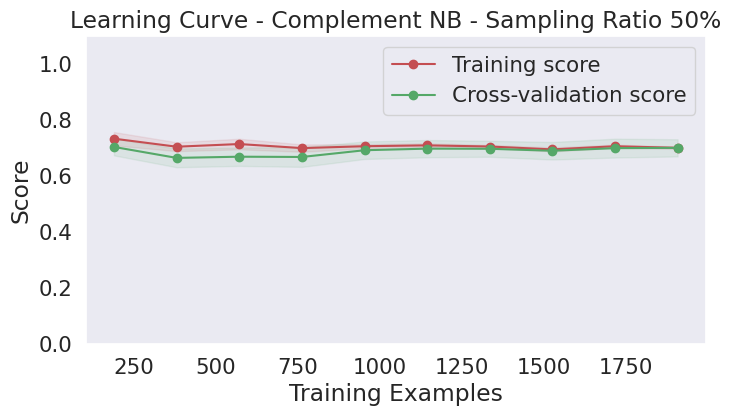

--------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.246 (+/- 0.026)
Recall: 0.510 (+/- 0.092)
F1: 0.331 (+/- 0.040)
Accuracy: 0.690 (+/- 0.021)


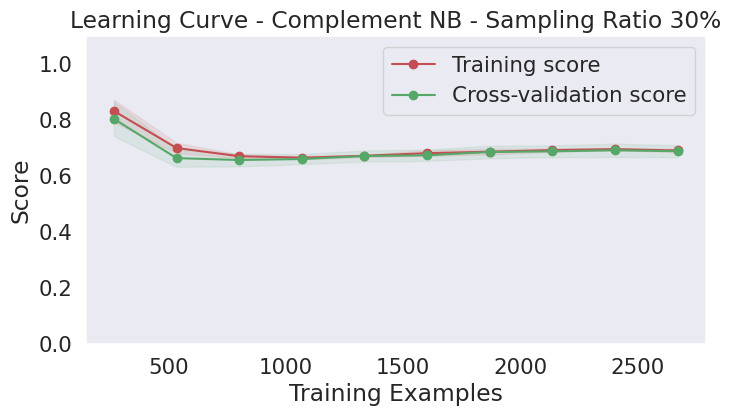

--------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.254 (+/- 0.024)
Recall: 0.501 (+/- 0.085)
F1: 0.336 (+/- 0.038)
Accuracy: 0.699 (+/- 0.017)


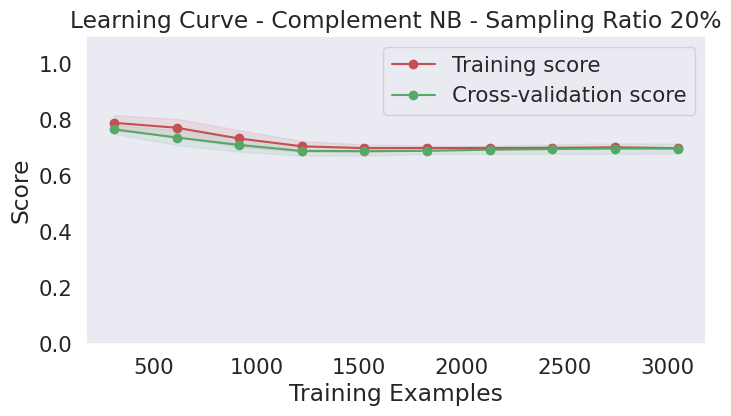

--------------------------------------------------------------------------------------------


In [30]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Create pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler()),
    ('clf', ComplementNB())
])

# Define samplings
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]


# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring, error_score='raise')

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")


    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.figure(figsize=(8, 4))
    plt.title(f"Learning Curve - Complement NB - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("--------------------------------------------------------------------------------------------")

##### Logistic Regression

Best hyperparameters: {'imputer__n_neighbors': 16, 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 0.6737000157401862}

Sampling Ratio: 50%
Precision: 0.279 (+/- 0.027)
Recall: 0.689 (+/- 0.070)
F1: 0.397 (+/- 0.038)
Accuracy: 0.686 (+/- 0.021)


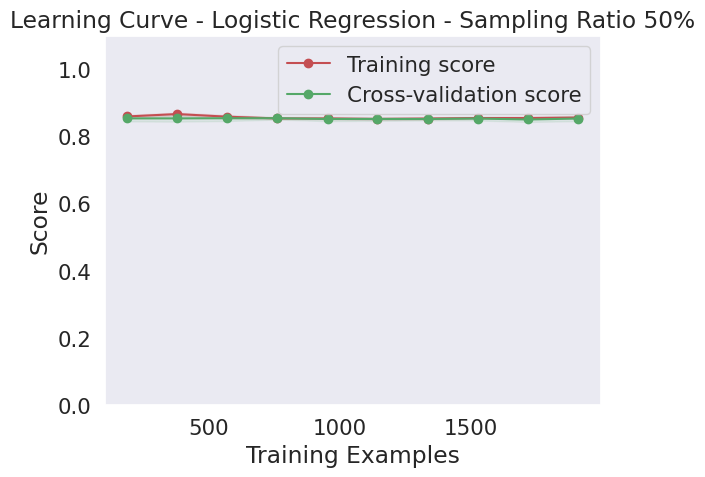

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.272 (+/- 0.015)
Recall: 0.684 (+/- 0.043)
F1: 0.389 (+/- 0.021)
Accuracy: 0.675 (+/- 0.017)


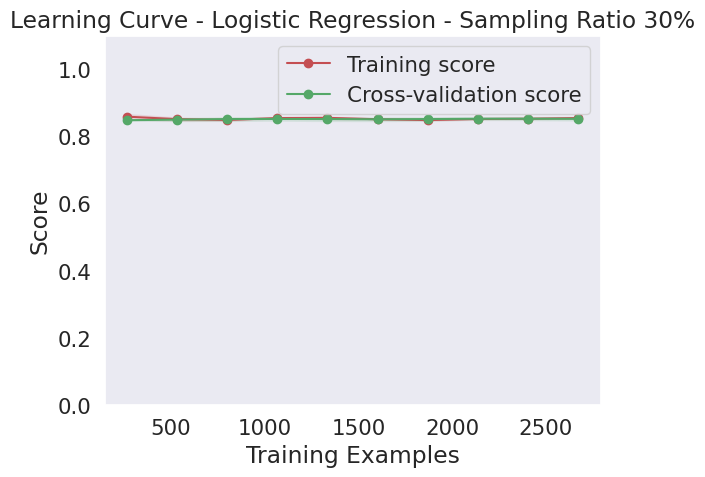

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.272 (+/- 0.013)
Recall: 0.670 (+/- 0.060)
F1: 0.387 (+/- 0.022)
Accuracy: 0.674 (+/- 0.011)


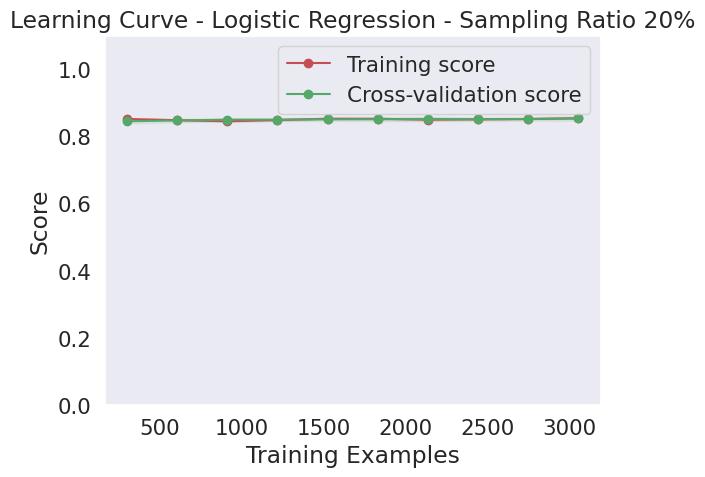

----------------------------------------------------------------------------------------------------


In [45]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression())
])

# define the hyperparameters to tune
hyperparameters = {
     'imputer__n_neighbors': np.arange(1, 21),
     'clf__C': np.random.uniform(low=0, high=4, size=(100,)),
              'clf__penalty': ['l2'],
              'clf__class_weight': ['balanced', None]}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - Logistic Regression - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)
    

#####Linear Regression (with regularization - Ridge) [EC]

Best hyperparameters: {'imputer__n_neighbors': 7, 'clf__fit_intercept': True, 'clf__alpha': 0.1}

Sampling Ratio: 50%
Precision: 0.583 (+/- 0.382)
Recall: 0.028 (+/- 0.017)
F1: 0.054 (+/- 0.032)
Accuracy: 0.852 (+/- 0.005)


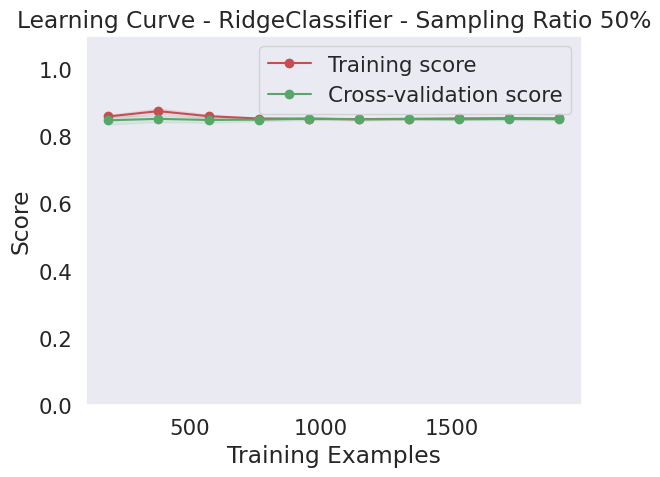

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.540 (+/- 0.474)
Recall: 0.018 (+/- 0.017)
F1: 0.034 (+/- 0.031)
Accuracy: 0.850 (+/- 0.004)


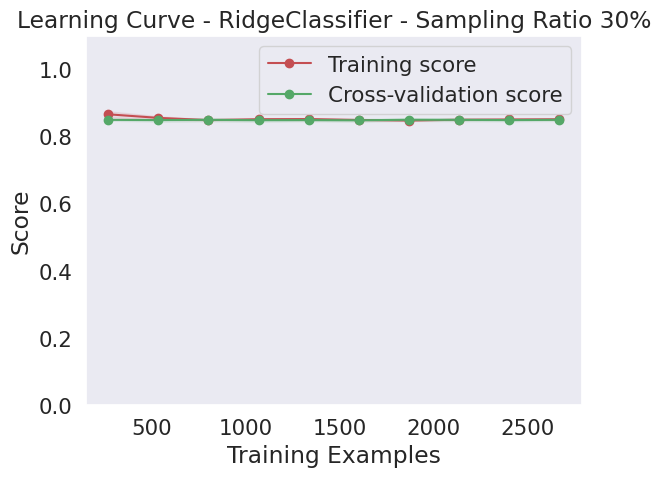

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.630 (+/- 0.400)
Recall: 0.033 (+/- 0.026)
F1: 0.061 (+/- 0.047)
Accuracy: 0.849 (+/- 0.005)


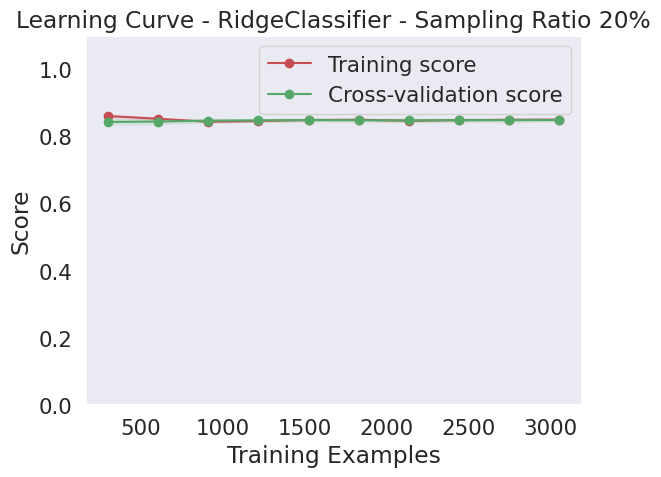

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler()),
    ('clf', RidgeClassifier())
])

# define the hyperparameters to tune
hyperparameters = {
    'imputer__n_neighbors': np.arange(1, 21),
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
    'clf__fit_intercept': [True, False],
}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - RidgeClassifier - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)
    


Sampling Ratio: 50%
Precision: 0.583 (+/- 0.382)
Recall: 0.028 (+/- 0.017)
F1: 0.054 (+/- 0.032)
Accuracy: 0.852 (+/- 0.005)


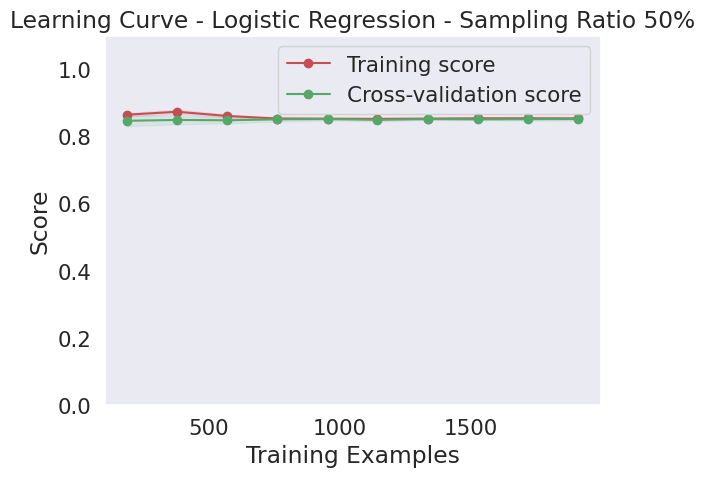

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.540 (+/- 0.474)
Recall: 0.018 (+/- 0.017)
F1: 0.034 (+/- 0.031)
Accuracy: 0.850 (+/- 0.004)


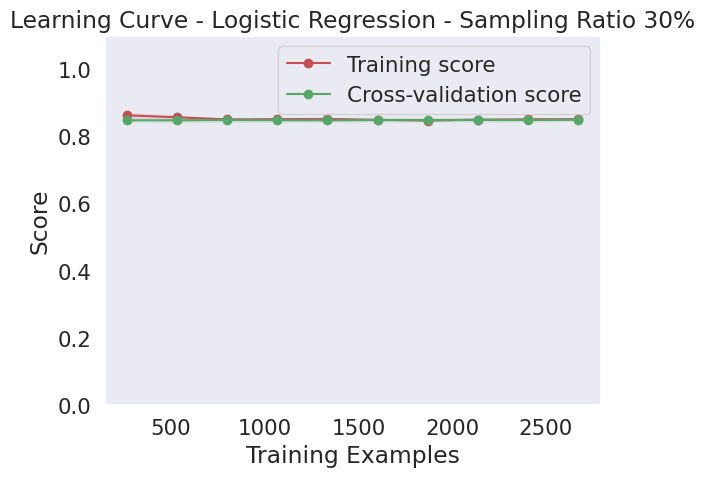

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.630 (+/- 0.400)
Recall: 0.033 (+/- 0.026)
F1: 0.061 (+/- 0.047)
Accuracy: 0.849 (+/- 0.005)


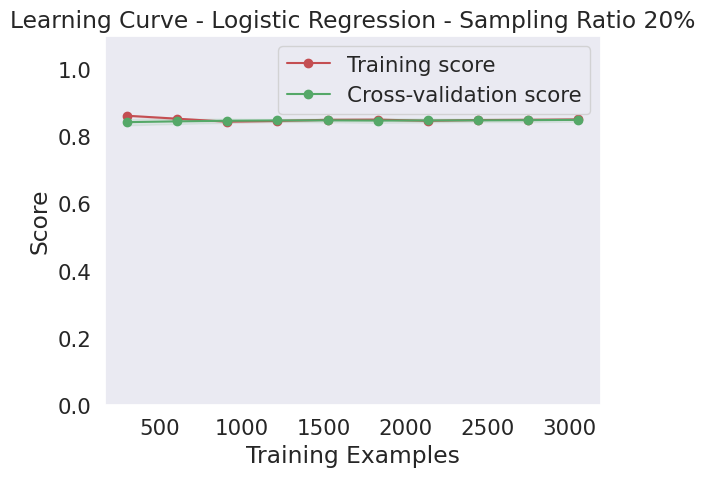

----------------------------------------------------------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.model_selection import KFold


# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', MinMaxScaler()),
    ('regressor', RidgeClassifier(alpha = .1))
])

cv = 10

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - Logistic Regression - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)
    

##### SVM - Linear Kernel

Sampling ratio: 0.5
accuracy: 0.690 +/- 0.019
precision: 0.265 +/- 0.028
recall: 0.607 +/- 0.080
f1: 0.369 +/- 0.042


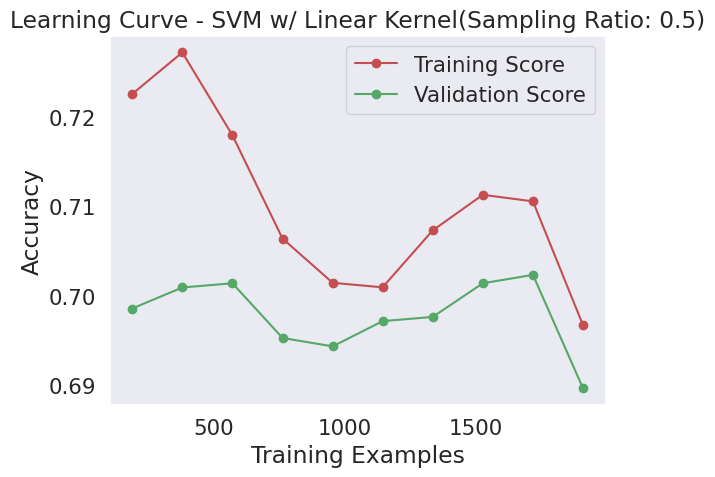

----------------------------------------------------------------------------------------------------
Sampling ratio: 0.7
accuracy: 0.710 +/- 0.051
precision: 0.290 +/- 0.054
recall: 0.616 +/- 0.100
f1: 0.393 +/- 0.064


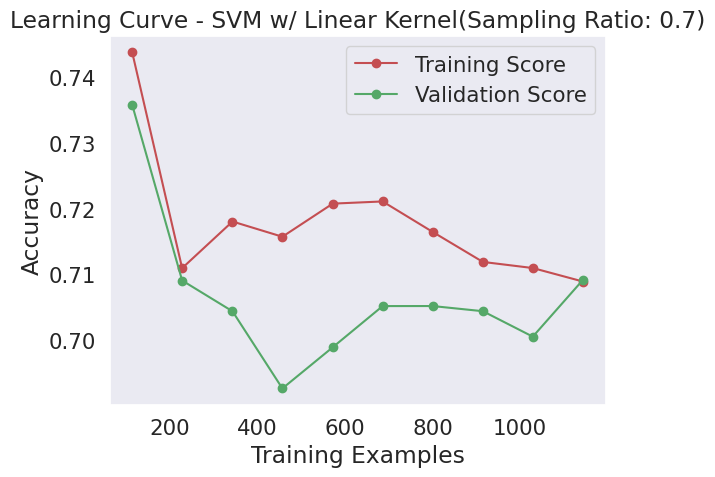

----------------------------------------------------------------------------------------------------
Sampling ratio: 0.8
accuracy: 0.716 +/- 0.066
precision: 0.284 +/- 0.077
recall: 0.617 +/- 0.135
f1: 0.386 +/- 0.091


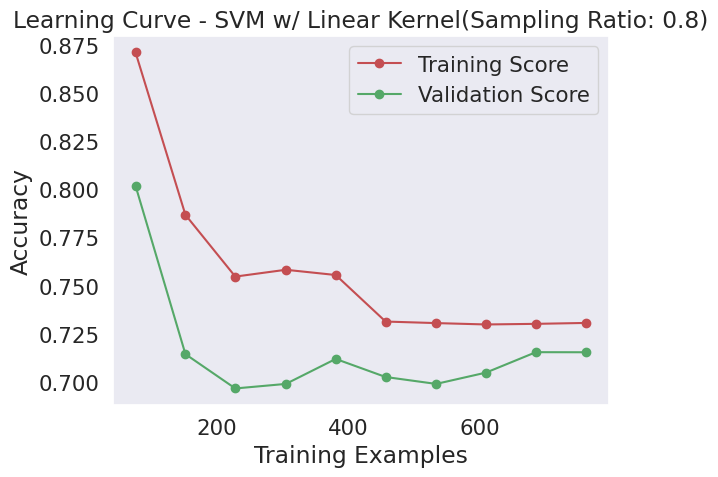

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Create feature and target matrices
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Create the pipeline
pipe = Pipeline([
        ('imputer', KNNImputer(n_neighbors = 21)),
        ('scaler', StandardScaler()),
        ('clf', SVC(C=.01, kernel='linear', gamma='auto', class_weight='balanced'))
])

# Define the sampling ratios to evaluate
ratios = [0.5, 0.7, 0.8]

# Define the evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

for ratio in ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Fit the pipeline on the train set
    pipe.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    scores = cross_validate(pipe, X_train, y_train, cv=10, scoring=scoring)

    # Print the evaluation metrics
    print(f'Sampling ratio: {ratio}')
    for metric in scoring:
        metric_scores = scores[f'test_{metric}']
        mean_score = np.mean(metric_scores)
        std_score = np.std(metric_scores)
        print(f'{metric}: {mean_score:.3f} +/- {std_score:.3f}')

    # Plot the learning curve
    train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.title(f'Learning Curve - SVM w/ Linear Kernel(Sampling Ratio: {ratio})')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Score')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)


##### SVM - RBF kernel

Sampling ratio: 0.5
accuracy: 0.664 +/- 0.020
precision: 0.259 +/- 0.022
recall: 0.667 +/- 0.068
f1: 0.373 +/- 0.032


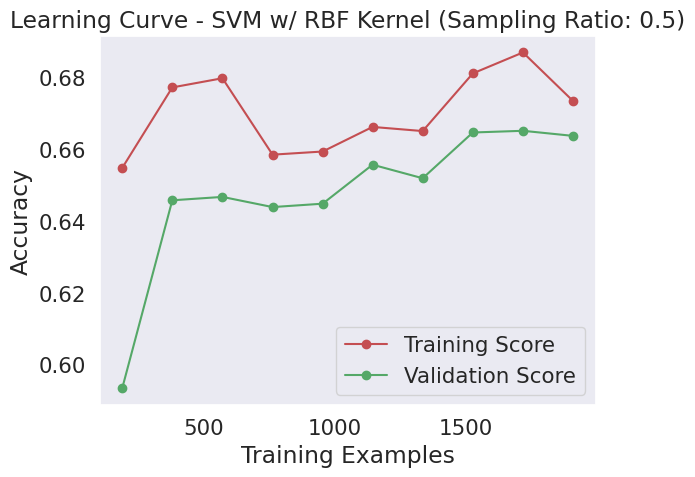

----------------------------------------------------------------------------------------------------
Sampling ratio: 0.7
accuracy: 0.681 +/- 0.040
precision: 0.270 +/- 0.035
recall: 0.647 +/- 0.093
f1: 0.380 +/- 0.045


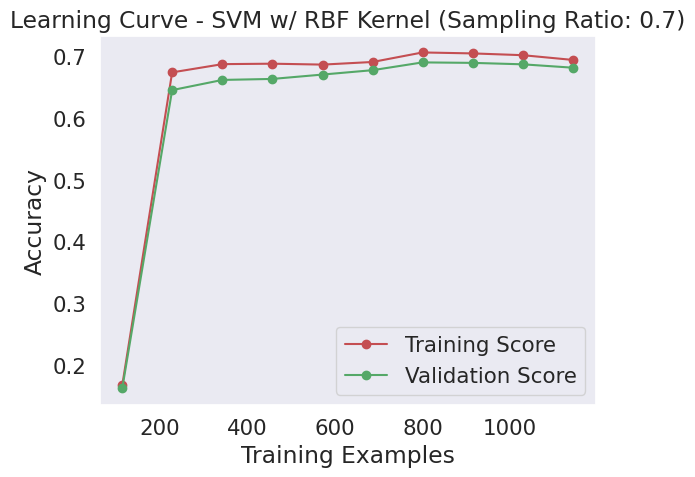

----------------------------------------------------------------------------------------------------
Sampling ratio: 0.8
accuracy: 0.677 +/- 0.052
precision: 0.268 +/- 0.047
recall: 0.717 +/- 0.107
f1: 0.388 +/- 0.057


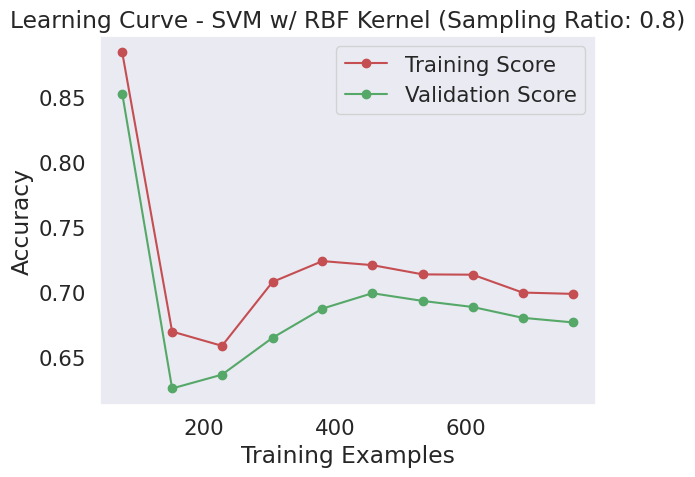

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Create feature and target matrices
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Create the pipeline
pipe = Pipeline([
        ('imputer', KNNImputer(n_neighbors=21)),
        ('scaler', StandardScaler()),
        ('classifier', SVC(C=.1, kernel='rbf', gamma='auto', class_weight='balanced'))
])

# Define the sampling ratios to evaluate
ratios = [0.5, 0.7, 0.8]

# Define the evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

for ratio in ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Fit the pipeline on the train set
    pipe.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    scores = cross_validate(pipe, X_train, y_train, cv=10, scoring=scoring)

    # Print the evaluation metrics
    print(f'Sampling ratio: {ratio}')
    for metric in scoring:
        metric_scores = scores[f'test_{metric}']
        mean_score = np.mean(metric_scores)
        std_score = np.std(metric_scores)
        print(f'{metric}: {mean_score:.3f} +/- {std_score:.3f}')

    # Plot the learning curve
    train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.title(f'Learning Curve - SVM w/ RBF Kernel (Sampling Ratio: {ratio})')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Score')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)


##### Gradient Boosting

Best hyperparameters: {'imputer__n_neighbors': 12, 'clf__n_estimators': 50, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 2, 'clf__max_features': None, 'clf__max_depth': 3, 'clf__learning_rate': 1}

Sampling Ratio: 50%
Precision: 0.249 (+/- 0.084)
Recall: 0.182 (+/- 0.058)
F1: 0.209 (+/- 0.067)
Accuracy: 0.793 (+/- 0.021)


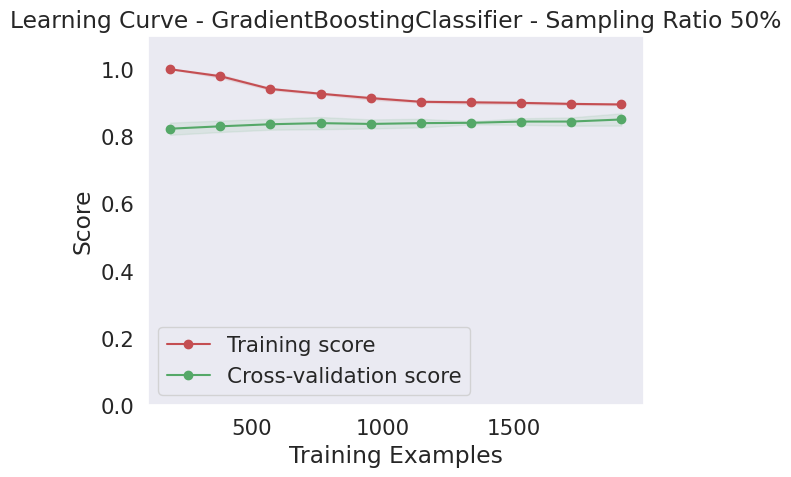

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.310 (+/- 0.099)
Recall: 0.181 (+/- 0.083)
F1: 0.224 (+/- 0.085)
Accuracy: 0.815 (+/- 0.022)


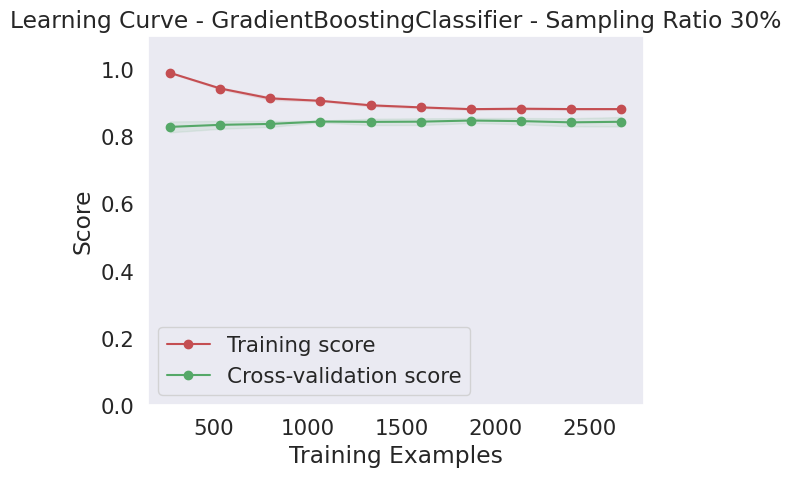

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.300 (+/- 0.086)
Recall: 0.165 (+/- 0.062)
F1: 0.210 (+/- 0.066)
Accuracy: 0.812 (+/- 0.017)


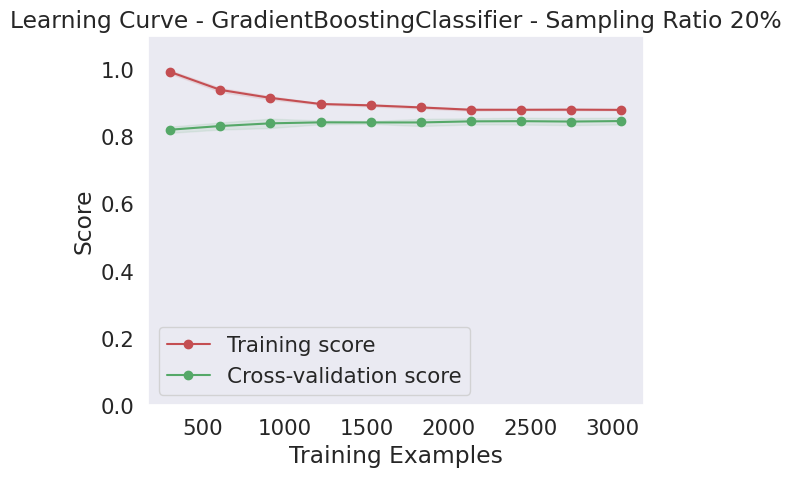

----------------------------------------------------------------------------------------------------


In [57]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])

# define the hyperparameters to tune
hyperparameters = {
    'imputer__n_neighbors': np.arange(1, 21),
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None],
}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - GradientBoostingClassifier - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)

##### Multi-layer Perceptron (MLP)


Sampling Ratio: 50%
Precision: 0.549 (+/- 0.336)
Recall: 0.069 (+/- 0.027)
F1: 0.120 (+/- 0.049)
Accuracy: 0.849 (+/- 0.012)


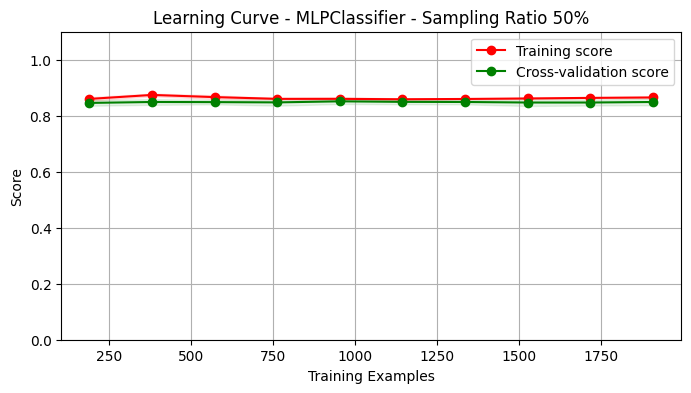

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.538 (+/- 0.217)
Recall: 0.073 (+/- 0.033)
F1: 0.128 (+/- 0.056)
Accuracy: 0.849 (+/- 0.010)


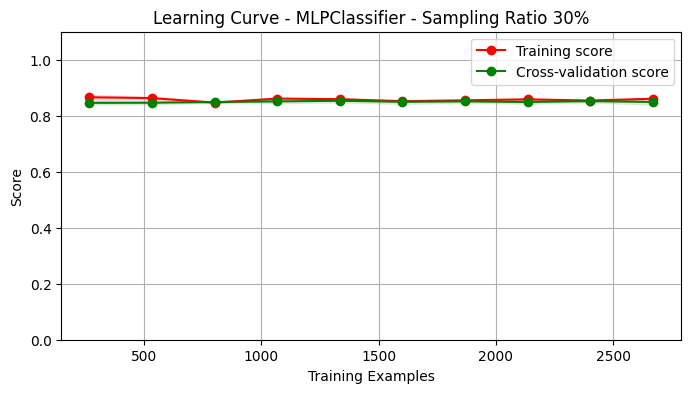

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.639 (+/- 0.235)
Recall: 0.077 (+/- 0.038)
F1: 0.134 (+/- 0.061)
Accuracy: 0.850 (+/- 0.010)


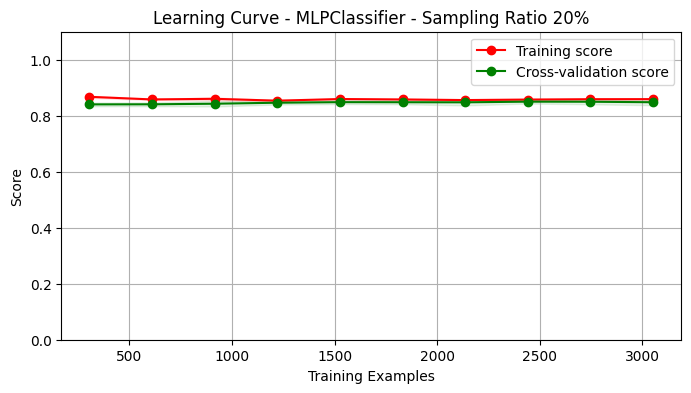

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Create pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=42))
])

# Define samplings
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]


# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring, error_score='raise')

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")


    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.figure(figsize=(8, 4))
    plt.title(f"Learning Curve - MLPClassifier - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)

##### KNN (EC #1)

Best hyperparameters: {'imputer__n_neighbors': 13, 'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 1}

Sampling Ratio: 50%
Precision: 0.250 (+/- 0.061)
Recall: 0.214 (+/- 0.062)
F1: 0.229 (+/- 0.061)
Accuracy: 0.786 (+/- 0.019)


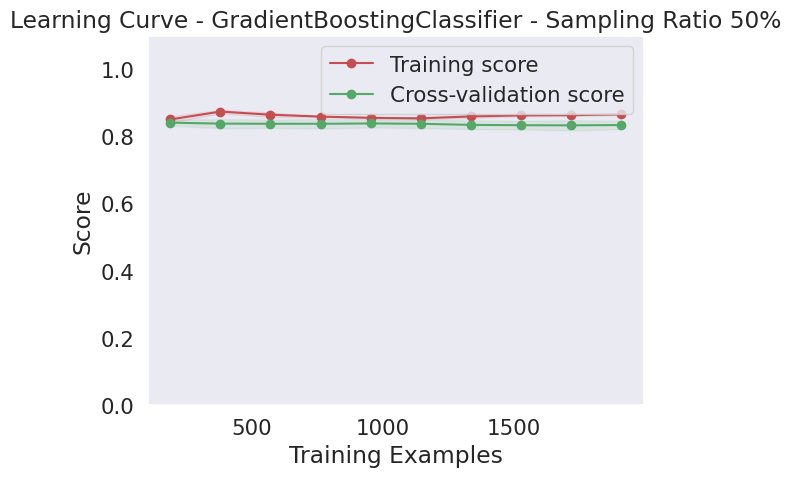

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.235 (+/- 0.072)
Recall: 0.227 (+/- 0.071)
F1: 0.230 (+/- 0.068)
Accuracy: 0.771 (+/- 0.022)


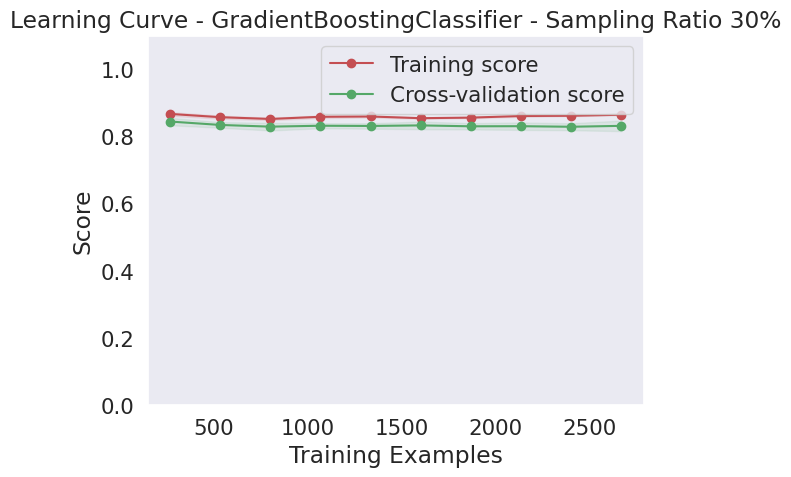

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.263 (+/- 0.057)
Recall: 0.236 (+/- 0.043)
F1: 0.248 (+/- 0.047)
Accuracy: 0.779 (+/- 0.020)


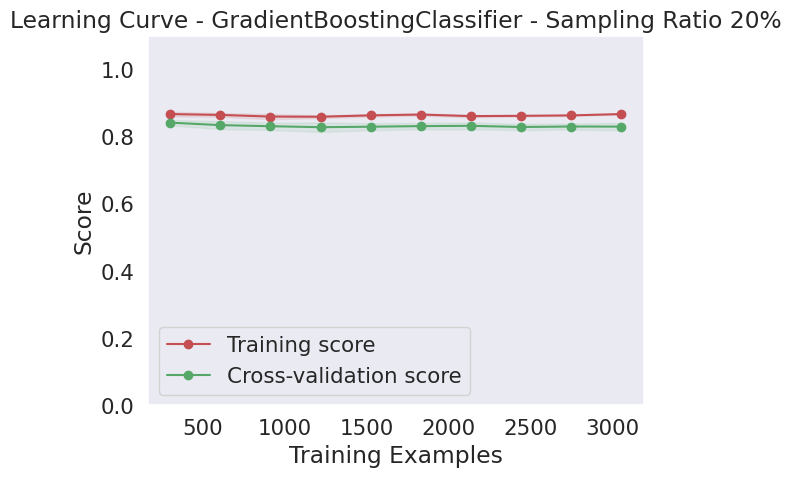

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# define the hyperparameters to tune
hyperparameters = {
      'imputer__n_neighbors': np.arange(1, 21), # number of neighbors for KNN imputation
    'clf__n_neighbors': np.arange(1, 21), # number of neighbors for KNN classification
    'clf__weights': ['uniform', 'distance'], # weighting scheme for neighbors
    'clf__p': [1, 2] # L1 or L2 distance metr
}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - KNN - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)

##### AdaBoost (EC #2)

Best hyperparameters: {'imputer__n_neighbors': 6, 'clf__n_estimators': 100, 'clf__learning_rate': 1, 'clf__algorithm': 'SAMME.R'}

Sampling Ratio: 50%
Precision: 0.390 (+/- 0.203)
Recall: 0.107 (+/- 0.071)
F1: 0.165 (+/- 0.107)
Accuracy: 0.843 (+/- 0.018)


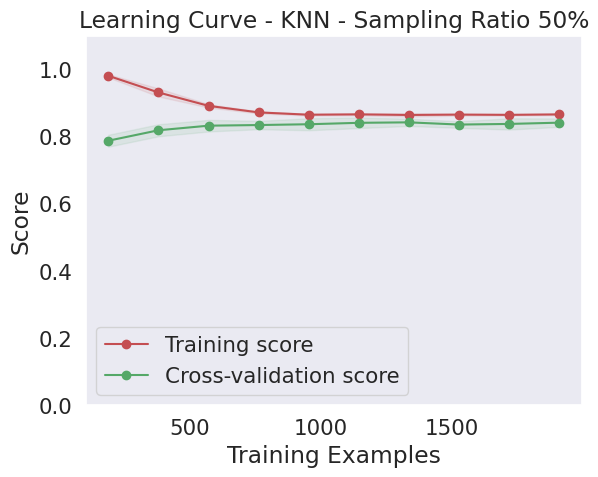

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.376 (+/- 0.151)
Recall: 0.096 (+/- 0.061)
F1: 0.150 (+/- 0.085)
Accuracy: 0.841 (+/- 0.012)


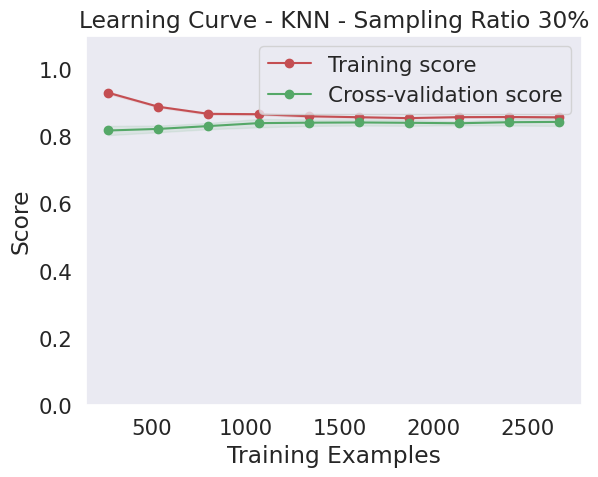

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.487 (+/- 0.118)
Recall: 0.121 (+/- 0.039)
F1: 0.192 (+/- 0.056)
Accuracy: 0.845 (+/- 0.009)


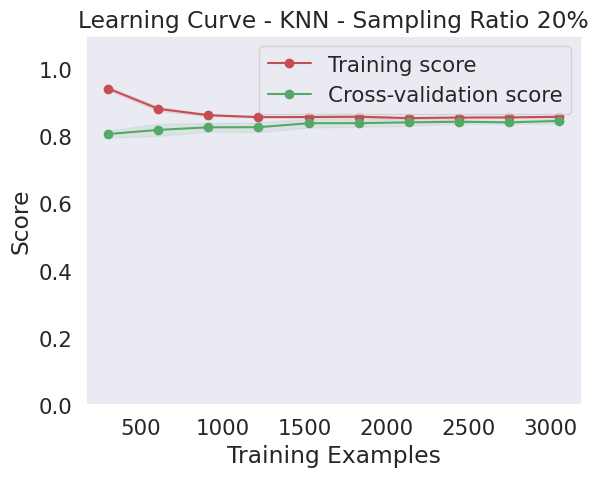

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('clf', AdaBoostClassifier())
])

# define the hyperparameters to tune
hyperparameters = {
      'imputer__n_neighbors': np.arange(1, 21), # number of neighbors for KNN imputation
      'clf__n_estimators': [50, 100, 200],
     'clf__learning_rate': [0.01, 0.1, 1],
     'clf__algorithm': ['SAMME', 'SAMME.R']
}

# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - KNN - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)

##### XBG EC #3

Best hyperparameters: {'imputer__n_neighbors': 13, 'clf__subsample': 0.9, 'clf__n_estimators': 100, 'clf__max_depth': 3, 'clf__learning_rate': 1, 'clf__colsample_bytree': 0.7}

Sampling Ratio: 50%
Precision: 0.287 (+/- 0.118)
Recall: 0.195 (+/- 0.083)
F1: 0.229 (+/- 0.093)
Accuracy: 0.806 (+/- 0.024)


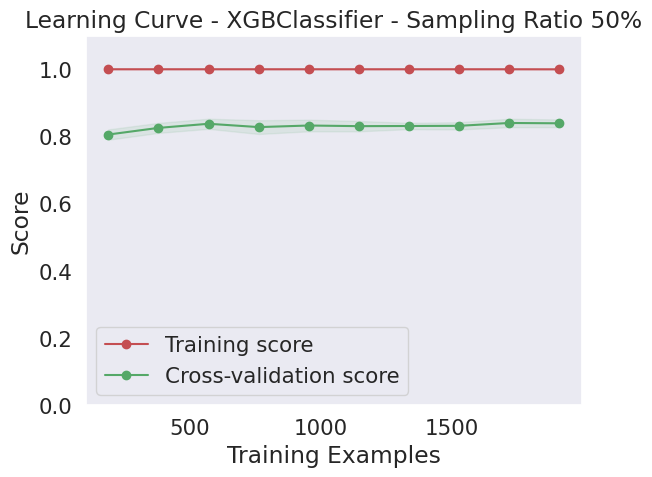

----------------------------------------------------------------------------------------------------

Sampling Ratio: 30%
Precision: 0.249 (+/- 0.101)
Recall: 0.165 (+/- 0.099)
F1: 0.195 (+/- 0.101)
Accuracy: 0.802 (+/- 0.024)


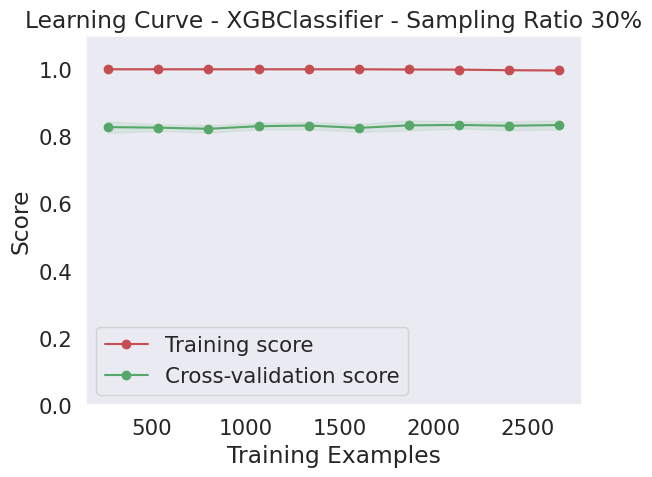

----------------------------------------------------------------------------------------------------

Sampling Ratio: 20%
Precision: 0.273 (+/- 0.066)
Recall: 0.184 (+/- 0.058)
F1: 0.218 (+/- 0.060)
Accuracy: 0.800 (+/- 0.015)


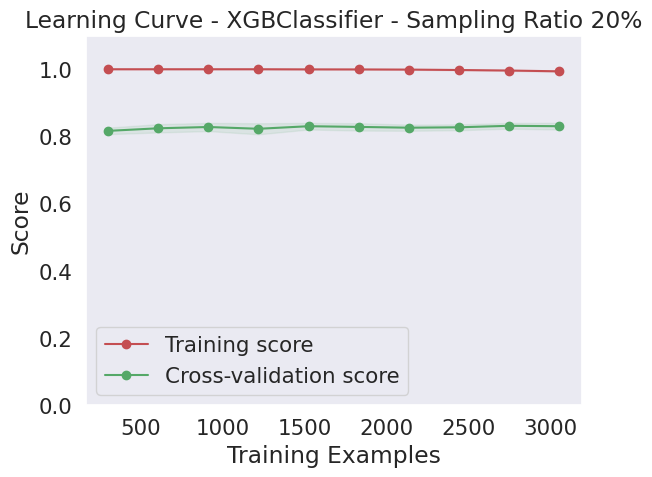

----------------------------------------------------------------------------------------------------


In [ ]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier())
])

# define the hyperparameters to tune
hyperparameters = {
      'imputer__n_neighbors': np.arange(1, 21), # number of neighbors for KNN imputation
      'clf__learning_rate': [0.01, 0.1, 1],
      'clf__max_depth': [3, 5, 7],
      'clf__subsample': [0.5, 0.7, 0.9],
      'clf__colsample_bytree': [0.5, 0.7, 0.9],
      'clf__n_estimators': [50, 100, 200]
}



# perform random search to find the best hyperparameters
cv = 10
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# evaluate the model on three sampling evaluations
samplings = [(0.5, '50-50'), (0.3, '70-30'), (0.2, '80-20')]

scoring = ["precision", "recall", "f1", "accuracy"]

# Iterate over samplings
for ratio, name in samplings:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=10, n_jobs=-1, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    
    # Train and evaluate the classifier using 10-fold cross-validation
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1, scoring=scoring)

    # Print the fold results
    print(f"\nSampling Ratio: {int(ratio*100)}%")
    for metric in scoring:
        print(f"{metric.capitalize()}: {cv_results['test_'+metric].mean():.3f} (+/- {cv_results['test_'+metric].std():.3f})")
      
    # Calculate mean and std for each fold
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    

    # Plot learning curves
    plt.title(f"Learning Curve - XGBClassifier - Sampling Ratio {int(ratio*100)}%")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    print("-"*100)

Sampling ratio: 0.5
accuracy: 0.709 +/- 0.016
precision: 0.272 +/- 0.029
recall: 0.563 +/- 0.089
f1: 0.366 +/- 0.044


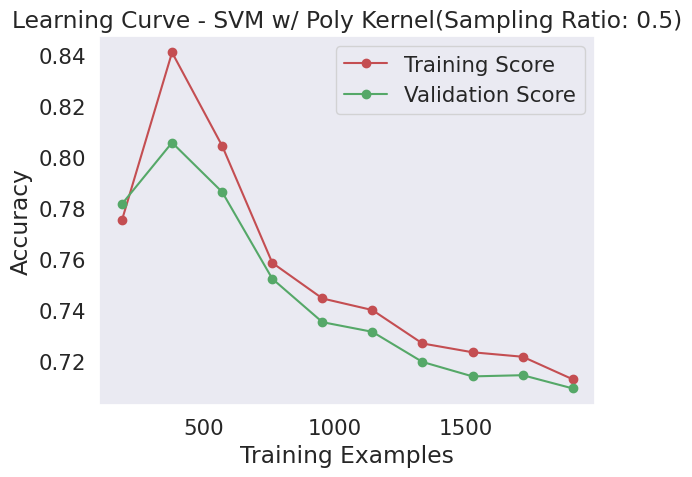

----------------------------------------------------------------------------------------------------
Sampling ratio: 0.7
accuracy: 0.734 +/- 0.031
precision: 0.295 +/- 0.050
recall: 0.553 +/- 0.128
f1: 0.383 +/- 0.069


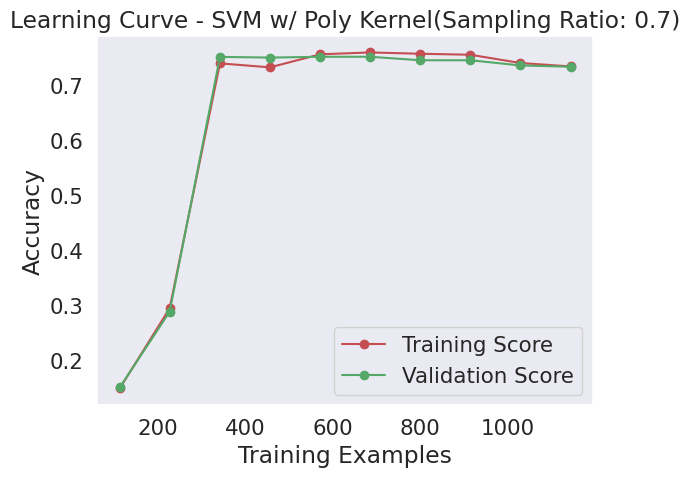

----------------------------------------------------------------------------------------------------
Sampling ratio: 0.8
accuracy: 0.764 +/- 0.049
precision: 0.319 +/- 0.081
recall: 0.550 +/- 0.119
f1: 0.401 +/- 0.088


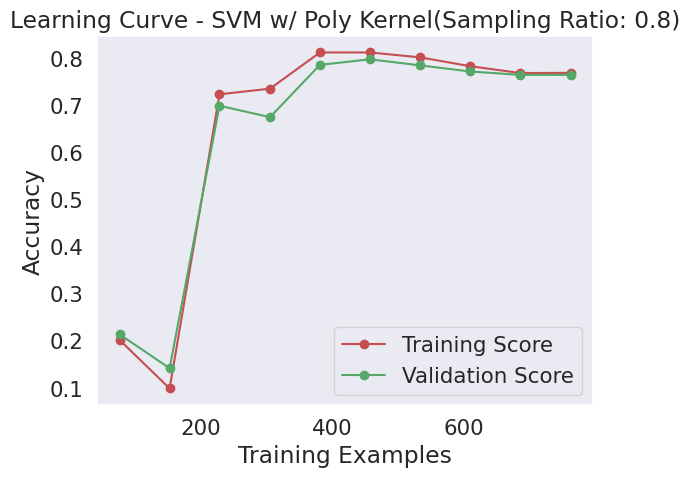

----------------------------------------------------------------------------------------------------


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Create feature and target matrices
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Create the pipeline
pipe = Pipeline([
        ('imputer', KNNImputer(n_neighbors = 21)),
        ('scaler', StandardScaler()),
        ('clf', SVC(C=.01, kernel='poly',degree = 1, gamma='scale', class_weight='balanced'))
])

# Define the sampling ratios to evaluate
ratios = [0.5, 0.7, 0.8]

# Define the evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

for ratio in ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Fit the pipeline on the train set
    pipe.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    scores = cross_validate(pipe, X_train, y_train, cv=10, scoring=scoring)

    # Print the evaluation metrics
    print(f'Sampling ratio: {ratio}')
    for metric in scoring:
        metric_scores = scores[f'test_{metric}']
        mean_score = np.mean(metric_scores)
        std_score = np.std(metric_scores)
        print(f'{metric}: {mean_score:.3f} +/- {std_score:.3f}')

    # Plot the learning curve
    train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.title(f'Learning Curve - SVM w/ Poly Kernel(Sampling Ratio: {ratio})')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Score')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)


#### **Model Selection (Testing Models)**

Selecting the best model from training step, for each different classifier, evaluate on the testing set.
Evaluate the generalization error (only for the best model)
Showcase all metrics for the best model (same as above) AND plot the confusion matrix.

##### Random Forest

Precision: 0.314
Recall: 0.287
F1 Score: 0.300
Accuracy: 0.797
Generalization Error: 0.203


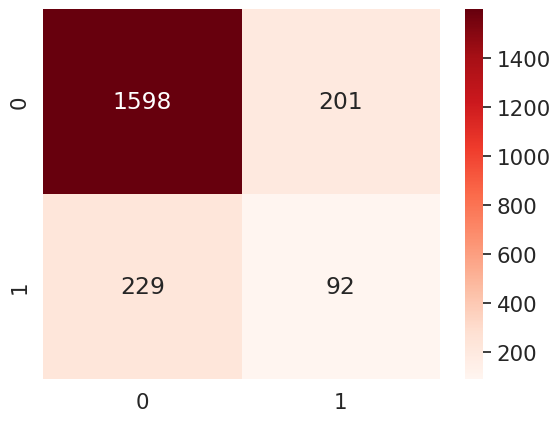

In [75]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=6)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators = 300,
                                   min_samples_split = 2,
                                   min_samples_leaf = 4,
                                   max_depth = 9,
                                   class_weight = "balanced_subsample",
                                   random_state = 42
))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

# creating dict to put into big tables
random_forest_dict = {'Model': ' RandomForest',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [77]:
# print classification report
print('RandomForest Classification Report\n',classification_report(y_test, y_pred))

RandomForest Classification Report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1799
           1       0.31      0.29      0.30       321

    accuracy                           0.80      2120
   macro avg       0.59      0.59      0.59      2120
weighted avg       0.79      0.80      0.79      2120



##### Perceptron

Precision: 0.248
Recall: 0.242
F1 Score: 0.245
Accuracy: 0.770
Generalization Error: 0.230


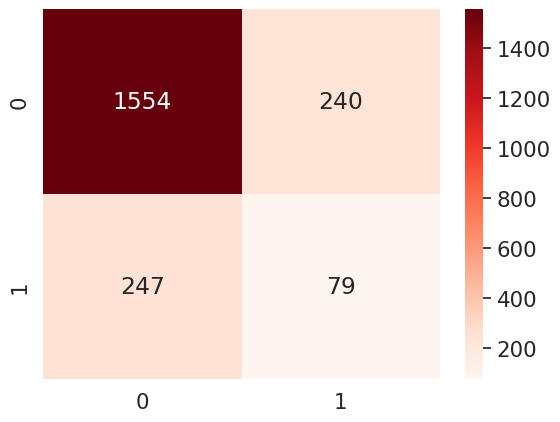

In [78]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 2)),
    ('scaler', StandardScaler()),
    ('clf', Perceptron(max_iter = 1000,alpha = 7054802310718645,random_state = 42)),
])


# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

# creating dict to put into big tables
perceptron_dict = {'Model': ' Perceptron',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [79]:
# print classification report
print('Perceptron Classification Report\n',classification_report(y_test, y_pred))

Perceptron Classification Report
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1794
           1       0.25      0.24      0.24       326

    accuracy                           0.77      2120
   macro avg       0.56      0.55      0.55      2120
weighted avg       0.77      0.77      0.77      2120



##### Naive Bayes (Complement)

Precision: 0.233
Recall: 0.463
F1 Score: 0.310
Accuracy: 0.683
Generalization Error: 0.317


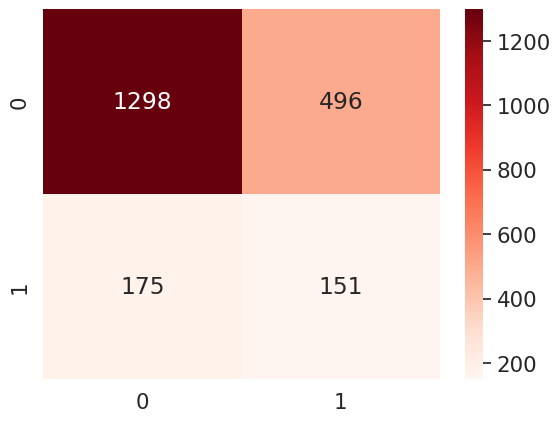

In [84]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler()),
    ('clf', ComplementNB())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")


# creating dict to put into big tables
ComplementNB_dict = {'Model': ' ComplementNB',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [85]:
# print classification report
print('NB Classification Report\n',classification_report(y_test, y_pred))

NB Classification Report
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      1794
           1       0.23      0.46      0.31       326

    accuracy                           0.68      2120
   macro avg       0.56      0.59      0.55      2120
weighted avg       0.78      0.68      0.72      2120



##### Logistic Regression

Precision: 0.256
Recall: 0.623
F1 Score: 0.363
Accuracy: 0.664
Generalization Error: 0.336


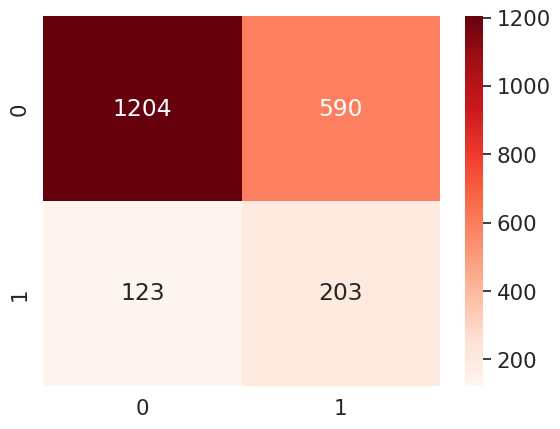

In [90]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 16)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty = 'l2', class_weight = 'balanced',C = 0.6737000157401862))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

LogReg_dict = {'Model': ' Logistic_Regression',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [87]:
print('LogReg Classification Report\n',classification_report(y_test, y_pred))

LogReg Classification Report
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      1794
           1       0.26      0.62      0.36       326

    accuracy                           0.66      2120
   macro avg       0.58      0.65      0.57      2120
weighted avg       0.81      0.66      0.71      2120



##### Linear Regression w/ Regularization [EC]

Precision: 0.500
Recall: 0.041
F1 Score: 0.075
Accuracy: 0.855
Generalization Error: 0.145


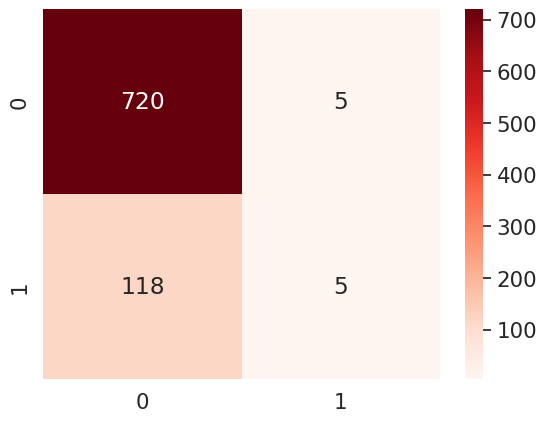

In [91]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 7)),
    ('scaler', MinMaxScaler()),
    ('clf', RidgeClassifier(fit_intercept =  True, alpha =  0.1,random_state = 42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

Ridge_dict = {'Model': ' Ridge Classifier',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [92]:
print('LinReg Classification Report\n',classification_report(y_test, y_pred))

LinReg Classification Report
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.04      0.08       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848



##### SVM - Linear Kernel

Precision: 0.245
Recall: 0.626
F1 Score: 0.353
Accuracy: 0.648
Generalization Error: 0.352


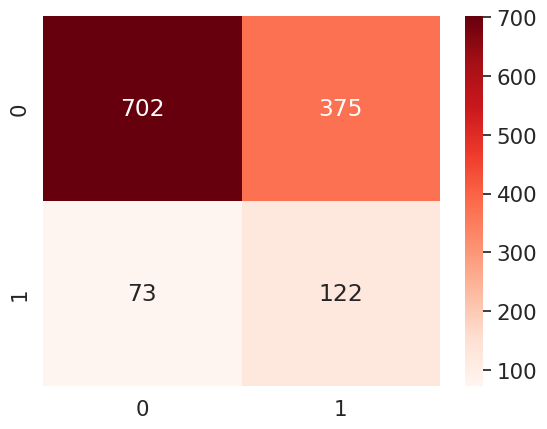

In [93]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 21)),
    ('scaler', StandardScaler()),
    ('clf', SVC(C=.01, kernel='linear', gamma='auto', class_weight='balanced'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

SVM_lineardict = {'Model': ' SVM w/ linear kernel',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [94]:
print('SVM- Linear Classification Report\n',classification_report(y_test, y_pred))

SVM- Linear Classification Report
               precision    recall  f1-score   support

           0       0.91      0.65      0.76      1077
           1       0.25      0.63      0.35       195

    accuracy                           0.65      1272
   macro avg       0.58      0.64      0.56      1272
weighted avg       0.80      0.65      0.70      1272



##### SVM - RBF Kernel

Precision: 0.236
Recall: 0.677
F1 Score: 0.350
Accuracy: 0.615
Generalization Error: 0.385


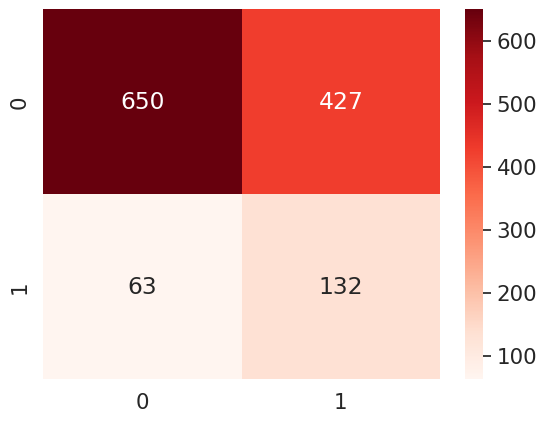

In [95]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 21)),
    ('scaler', StandardScaler()),
    ('clf', SVC(C=.01, kernel='rbf', gamma='auto', class_weight='balanced'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

SVM_rbfdict = {'Model': ' SVM w/ rbf kernel',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [96]:
print('SVM- RBF Classification Report\n',classification_report(y_test, y_pred))

SVM- RBF Classification Report
               precision    recall  f1-score   support

           0       0.91      0.60      0.73      1077
           1       0.24      0.68      0.35       195

    accuracy                           0.61      1272
   macro avg       0.57      0.64      0.54      1272
weighted avg       0.81      0.61      0.67      1272



##### Gradient Boosting

Precision: 0.251
Recall: 0.147
F1 Score: 0.186
Accuracy: 0.801
Generalization Error: 0.199


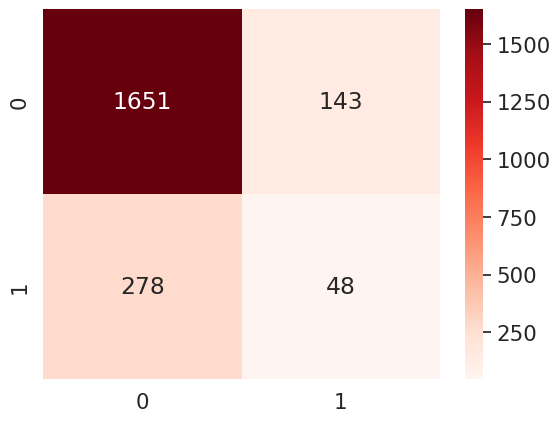

In [97]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 12)),
    ('scaler', MinMaxScaler()),
    ('clf', GradientBoostingClassifier(n_estimators =  50,
    min_samples_split = 10,
    min_samples_leaf = 2,
    max_features = None,
    max_depth = 3,
    learning_rate = 1        
    ))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

Gradient_dict = {'Model': ' Gradient Boosting',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [98]:
print('Gradient Boosting Classification Report\n',classification_report(y_test, y_pred))

Gradient Boosting Classification Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1794
           1       0.25      0.15      0.19       326

    accuracy                           0.80      2120
   macro avg       0.55      0.53      0.54      2120
weighted avg       0.76      0.80      0.78      2120



##### MLP

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision: 0.707
Recall: 0.089
F1 Score: 0.158
Accuracy: 0.854
Generalization Error: 0.146


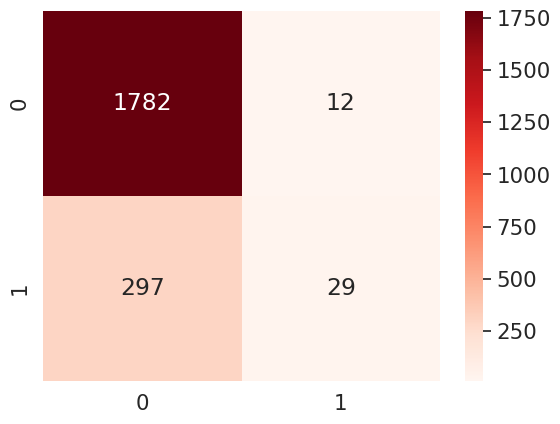

In [82]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 5)),
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")


MLP_dict = {'Model': ' MLP',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [83]:
# print classification report
print('MLP Classification Report\n',classification_report(y_test, y_pred))

MLP Classification Report
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1794
           1       0.71      0.09      0.16       326

    accuracy                           0.85      2120
   macro avg       0.78      0.54      0.54      2120
weighted avg       0.83      0.85      0.80      2120



##### KNN (EC #1)

Precision: 0.198
Recall: 0.179
F1 Score: 0.188
Accuracy: 0.776
Generalization Error: 0.224


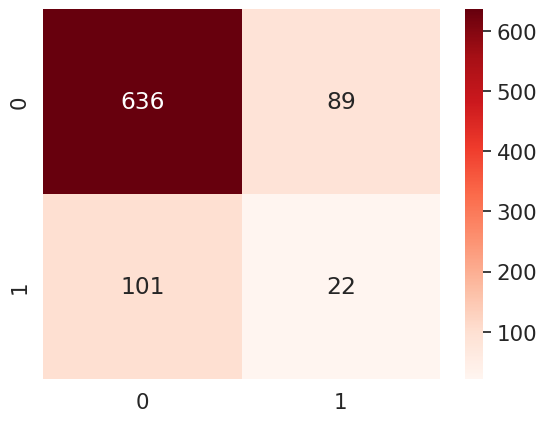

In [99]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 13)),
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(weights = 'distance', p =  1, n_neighbors = 1))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")



KNN_dict = {'Model': ' KNN',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [100]:
print('KNN Classification Report\n',classification_report(y_test, y_pred))

KNN Classification Report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       725
           1       0.20      0.18      0.19       123

    accuracy                           0.78       848
   macro avg       0.53      0.53      0.53       848
weighted avg       0.77      0.78      0.77       848



##### AdaBoost (EC #2)

Precision: 0.367
Recall: 0.089
F1 Score: 0.144
Accuracy: 0.846
Generalization Error: 0.154


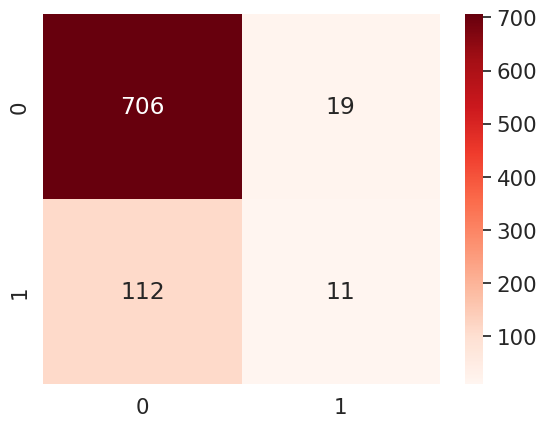

In [101]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 6)),
    ('scaler', MinMaxScaler()),
    ('clf', AdaBoostClassifier(n_estimators = 100,learning_rate = 1, algorithm = 'SAMME.R'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

Ada_dict = {'Model': ' AdaBoost',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [102]:
print('Adaboost Classification Report\n',classification_report(y_test, y_pred))

Adaboost Classification Report
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       725
           1       0.37      0.09      0.14       123

    accuracy                           0.85       848
   macro avg       0.61      0.53      0.53       848
weighted avg       0.79      0.85      0.80       848



##### XGB EC #3

Precision: 0.261
Recall: 0.181
F1 Score: 0.214
Accuracy: 0.795
Generalization Error: 0.205


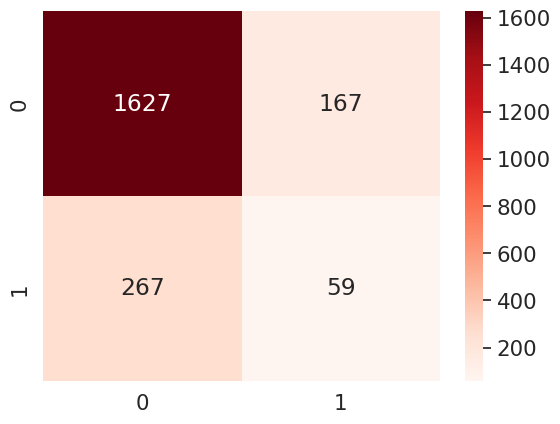

In [103]:
# Load the dataset
path = "/content/framingham.csv"
df = pd.read_csv(path)

# Split into X and y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 13)),
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(subsample = 0.9, n_estimators = 100, 
                          max_depth = 3,
                          learning_rate = 1,
                          colsample_bytree = 0.7))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the normal metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
gen_error = 1 - accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Generalization Error: {gen_error:.3f}")

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="g")

XGB_dict = {'Model': ' XGBClassifier',
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall}

In [104]:
print('Adaboost Classification Report\n',classification_report(y_test, y_pred))

Adaboost Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1794
           1       0.26      0.18      0.21       326

    accuracy                           0.80      2120
   macro avg       0.56      0.54      0.55      2120
weighted avg       0.77      0.80      0.78      2120



#### Big 3 Tables

In [69]:
results = []
results.append(random_forest_dict)
results.append(perceptron_dict)
results.append(ComplementNB_dict)
results.append(LogReg_dict)
results.append(Ridge_dict)
results.append(SVM_lineardict)
results.append(SVM_rbfdict)
results.append(Gradient_dict)
results.append(KNN_dict)
results.append(MLP_dict)
results.append(Ada_dict)
results.append(XGB_dict)

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall
0,RandomForest,0.797170,0.313993,0.286604
1,Perceptron,0.770283,0.247649,0.242331
2,ComplementNB,0.683491,0.233385,0.463190
3,Logistic_Regression,0.663679,0.255990,0.622699
4,Ridge Classifier,0.854953,0.500000,0.040650
5,SVM w/ linear kernel,0.647799,0.245473,0.625641
6,SVM w/ rbf kernel,0.614780,0.236136,0.676923
7,Gradient Boosting,0.801415,0.251309,0.147239
8,KNN,0.775943,0.198198,0.178862
9,MLP,0.857075,0.755556,0.104294


In [70]:
# Accuracy
accuracy_df = results_df[['Model', 'Accuracy']].copy()
accuracy_df

,Model,Accuracy
0,RandomForest,0.797170
1,Perceptron,0.770283
2,ComplementNB,0.683491
3,Logistic_Regression,0.663679
4,Ridge Classifier,0.854953
5,SVM w/ linear kernel,0.647799
6,SVM w/ rbf kernel,0.614780
7,Gradient Boosting,0.801415
8,KNN,0.775943
9,MLP,0.857075


In [71]:
# Precision
precision_df = results_df[['Model', 'Precision']].copy()
precision_df

,Model,Precision
0,RandomForest,0.313993
1,Perceptron,0.247649
2,ComplementNB,0.233385
3,Logistic_Regression,0.255990
4,Ridge Classifier,0.500000
5,SVM w/ linear kernel,0.245473
6,SVM w/ rbf kernel,0.236136
7,Gradient Boosting,0.251309
8,KNN,0.198198
9,MLP,0.755556


In [72]:
# Recall
Recall_df = results_df[['Model', 'Recall']].copy()
Recall_df

,Model,Recall
0,RandomForest,0.286604
1,Perceptron,0.242331
2,ComplementNB,0.463190
3,Logistic_Regression,0.622699
4,Ridge Classifier,0.040650
5,SVM w/ linear kernel,0.625641
6,SVM w/ rbf kernel,0.676923
7,Gradient Boosting,0.147239
8,KNN,0.178862
9,MLP,0.104294


In [ ]:
#Thank you :)